# Transformation of Stress

Specify the stress tensors and the unit vectors for new stress directions, press enter after each input.

## Stress Tensors:


## Unit Vectors for Direction:

## Input

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

## Result

<IPython.core.display.Latex object>

Original cube in blue; Transformed cube in green

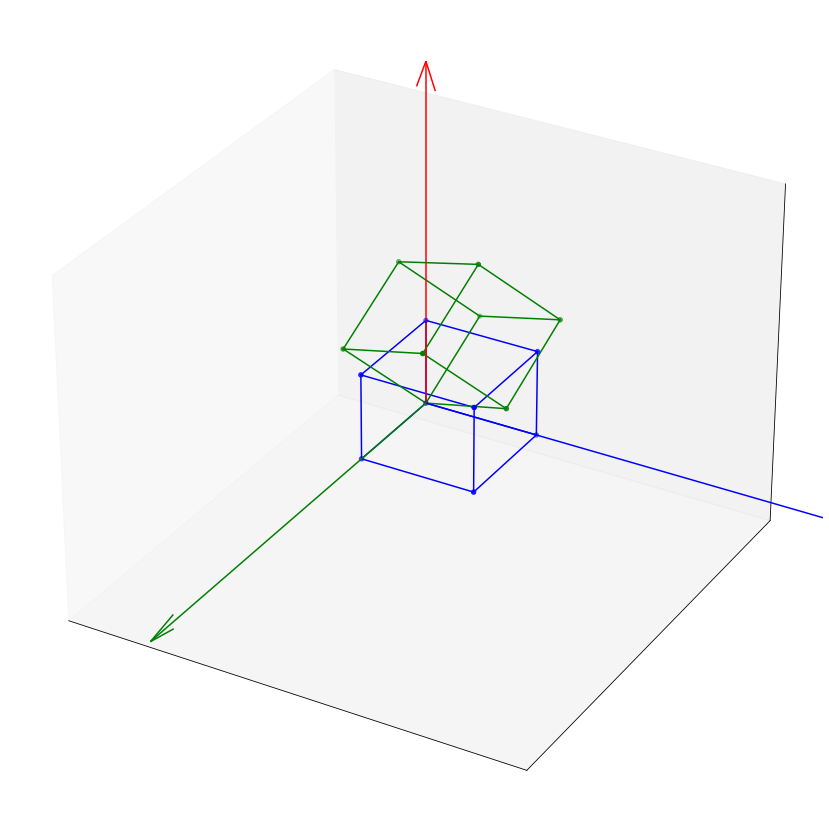

In [1]:
from cube import UnitCube
from IPython.display import display, Markdown
from itertools import product, combinations
import math
import matplotlib.pyplot as plt
import numpy as np
from stress import normal_stress_component as nsc
from stress import xy_stress_component as rsc
from utils import parse_input, parse_unit_vector_input, display_input, display_output

display(Markdown("## Stress Tensors:\n"))
Tx = input('Tx: ')
Ty = input('Ty: ')
Tz = input('Tz: ')

# Example data
# Tx = "100i + 50j - 50k"
# Ty = "50i + 200j"
# Tz = "-50i + 200k"


display(Markdown("## Unit Vectors for Direction:"))
N1 = input('N1: ')
N2 = input('N2: ')
N3 = input('N3: ')

# Example data
# N1 = "(sqrt(3)/2)i + (1/4)j + (sqrt(3)/4)k"
# N2 = "-(1/2)i +(sqrt(3)/4)j + (3/4)k"
# N3 = "-(sqrt(3)/2)j + (1/2)k"

stress_tensor = np.array([parse_input(Tx), parse_input(Ty), parse_input(Tz)])

display_input(stress_tensor, Tx, Ty, Tz, N1, N2, N3)

N_1 = parse_unit_vector_input(N1)
N_2 = parse_unit_vector_input(N2)
N_3 = parse_unit_vector_input(N3)

XX = nsc(stress_tensor, N_1)
XY = rsc(stress_tensor, N_1, N_2)
YY = nsc(stress_tensor, N_2)
XZ = rsc(stress_tensor, N_1, N_3)
ZZ = nsc(stress_tensor, N_3)
YZ = rsc(stress_tensor, N_2, N_3)

transformed_stress_tensor = np.array([[XX, XY, XZ], [XY, YY, YZ], [XZ, YZ, ZZ]])
display_output(transformed_stress_tensor)

# Display Cube
display(Markdown("Original cube in blue; Transformed cube in green"))
cube = UnitCube()
cube.drawInitialCube(color="blue")
cube.drawTransformedCube(N_1, N_2, N_3, "green")

plt.show()
